<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/9thWeekTask/MaterialStrength_Regression%26Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.1 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("sample_data/MaterialStrength.csv")

# **Regression**

In [4]:
# Fungsi untuk normalisasi nilai pada kolom
def normalize_label(value):
    value = value.lower()  # Ubah teks menjadi huruf kecil
    if all(char in value for char in 'yes'):  # Jika mengandung 'y', 'e', dan 's'
        return 1
    elif all(char in value for char in 'no'):  # Jika mengandung 'n' dan 'o'
        return 0
    else:
        return None  # Nilai lain jika tidak cocok

In [5]:
# Terapkan fungsi ke setiap kolom yang memerlukan normalisasi
for col in df.columns:
    if df[col].dtype == 'object':  # Hanya kolom bertipe object (string)
        df[col] = df[col].apply(normalize_label)

In [6]:
# Menangani nilai NaN jika ada
df = df.fillna(0)  # Mengisi nilai None dengan 0 (atau sesuai kebutuhan)

In [7]:
# Misalkan kolom 'Target' adalah target, dan sisanya adalah fitur
X = df.drop(columns=['target_feature'])  # Menghapus kolom target untuk fitur
y = df['target_feature']  # Mengambil kolom target

In [8]:
# Menampilkan informasi dataset
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")
print(f"Nama fitur: {list(X.columns)}")
print(f"Nama target: {y.name}")


Jumlah sampel: 1030
Jumlah fitur: 15
Jumlah kelas: 845
Nama fitur: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']
Nama target: target_feature


<ipython-input-9-aef1ce1533e1>:7: UserWarning: 
The palette list has fewer values (2) than needed (845) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'], alpha=0.7)


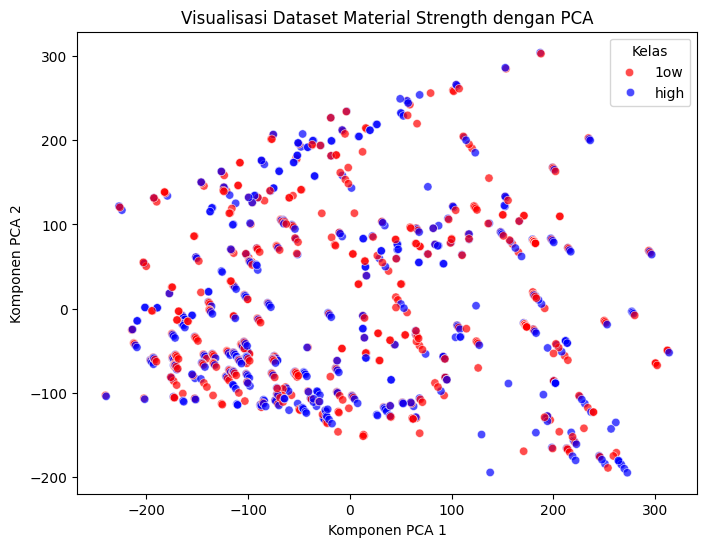

In [9]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("Visualisasi Dataset Material Strength dengan PCA")
plt.legend(title='Kelas', labels=['1ow', 'high'])
plt.show()

In [10]:
# Memeriksa kelas mana yang hanya memiliki satu sampel
y_counts = y.value_counts()
print("\nJumlah sampel per kelas:")
print(y_counts)


Jumlah sampel per kelas:
target_feature
33.40    6
77.30    4
79.30    4
31.35    4
71.30    4
        ..
47.40    1
51.96    1
56.74    1
17.57    1
32.77    1
Name: count, Length: 845, dtype: int64


In [11]:
# Menghapus kelas dengan hanya satu sampel
classes_to_remove = y_counts[y_counts == 1].index  # Menemukan kelas yang memiliki satu sampel
print(f"\nMenghapus kelas dengan satu sampel: {classes_to_remove}")


Menghapus kelas dengan satu sampel: Index([24.29, 33.95,  9.31, 33.66, 32.33, 11.41, 31.25, 20.59, 25.89, 25.08,
       ...
       38.77, 51.33, 56.85, 58.61, 36.99,  47.4, 51.96, 56.74, 17.57, 32.77],
      dtype='float64', name='target_feature', length=704)


In [12]:
# Menghapus kelas yang memiliki hanya satu sampel
X = X[~y.isin(classes_to_remove)]
y = y[~y.isin(classes_to_remove)]

In [13]:
# Memastikan bahwa setelah penghapusan, tidak ada kelas dengan hanya satu sampel
y_counts = y.value_counts()
print("\nJumlah sampel per kelas setelah penghapusan:")
print(y_counts)


Jumlah sampel per kelas setelah penghapusan:
target_feature
33.40    6
41.05    4
79.30    4
71.30    4
35.30    4
        ..
24.28    2
29.59    2
29.55    2
15.52    2
9.74     2
Name: count, Length: 141, dtype: int64


In [14]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y if len(np.unique(y)) > 1 else None
)


In [15]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# PCA pada data training yang telah distandardisasi
X_train_pca = pca.transform(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


<ipython-input-17-094a2f20e113>:3: UserWarning: 
The palette list has fewer values (2) than needed (141) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7)


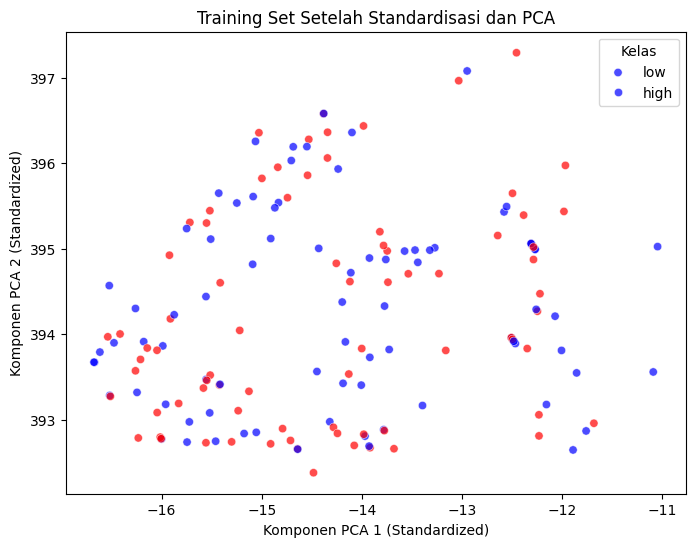

In [17]:
# Visualisasi data yang telah di-standardisasi dan diproses dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Komponen PCA 1 (Standardized)")
plt.ylabel("Komponen PCA 2 (Standardized)")
plt.title("Training Set Setelah Standardisasi dan PCA")
plt.legend(title='Kelas', labels=['low', 'high'])
plt.show()

In [18]:
# Ganti SVC dengan SVR
svr = SVR(kernel='poly')

# Definisikan parameter grid untuk SVR
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 1, 10]
}

# Grid Search dengan SVR
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Menampilkan hasil Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 100, 'coef0': 10, 'degree': 2, 'gamma': 'auto'}
Best cross-validation score: -39.27287869260333


In [19]:
# Menggunakan model terbaik dari Grid Search
best_clf = grid_search.best_estimator_

# Prediksi pada data testing
y_pred = best_clf.predict(X_test_scaled)

# Evaluasi performa regresi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 35.02
Mean Absolute Error (MAE): 4.07
R-squared (R²): 0.84


# **Classification**

In [20]:
# Bagi target menjadi tiga kategori berdasarkan nilai
bins = [0, 20, 30, np.inf]  # Definisi interval kelas
labels = [0, 1, 2]          # Label untuk setiap kelas
y_train = pd.cut(y_train, bins=bins, labels=labels).astype(int)
y_test = pd.cut(y_test, bins=bins, labels=labels).astype(int)

In [21]:
# Inisialisasi model SVC
svc = SVC()

In [22]:
# Definisikan parameter grid untuk SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [23]:
# Grid Search dengan SVC
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [24]:
# Menampilkan hasil Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8950757575757576


In [25]:
# Menggunakan model terbaik dari Grid Search
best_clf = grid_search.best_estimator_

In [26]:
# Prediksi pada data testing
y_pred = best_clf.predict(X_test_scaled)

In [27]:
# Evaluasi performa klasifikasi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.94

Confusion Matrix:
[[ 27   1   0]
 [  1  24   5]
 [  0   3 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.86      0.80      0.83        30
           2       0.95      0.97      0.96       105

    accuracy                           0.94       163
   macro avg       0.92      0.91      0.92       163
weighted avg       0.94      0.94      0.94       163



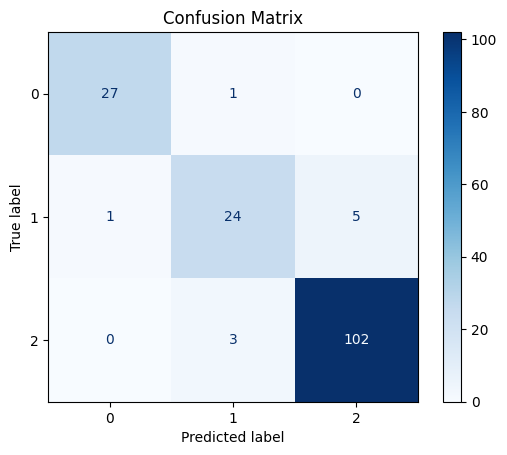

In [28]:
# Visualisasi menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()